In [141]:

import pytest
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from src.data.montel_data_getter import *



In [142]:
directory = " plots"
if not os.path.exists(directory):
    os.makedirs(directory)
    print("Directory '% s' for plots created" % directory)

In [143]:
# Get data of last 5 years
dg = MontelDataGetter("montel_test")
dg.get_data('2016-01-01', '2020-12-31', overwrite=True)
assert os.path.exists(os.path.join(dg.data_dir, 'data.csv'))
df = pd.read_csv(os.path.join(dg.data_dir, 'data.csv'))
assert df.shape == (dg._get_num_days() * 24, 2)

df['Time']= pd.to_datetime(df['Time'])
df = df.set_index("Time")

Text(0.5, 1.0, 'Electricity Price 2016-2020')

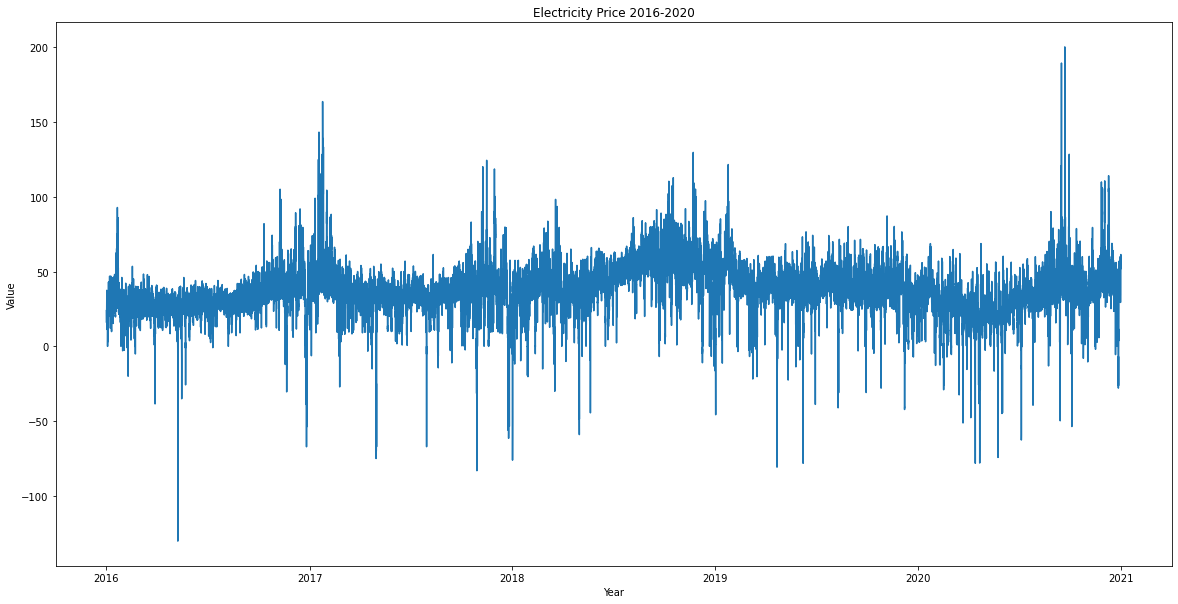

In [144]:
# Plotting

fig, ax = plt.subplots()

fig.set_size_inches(20, 10)

ax.plot(df.Value)
ax.set_xlabel("Year")
ax.set_ylabel("Value")
ax.set_title("Electricity Price 2016-2020")



In [145]:
fig.savefig('{}/Electricity prices 2016-2020'.format(directory))

In [146]:
# mean hourly distribution of 2016-2020

data = []
for i in range(24):
    data.append([i, df[i::24].mean().values[0]])
data = pd.DataFrame(data, columns=["Hour","Value"])


Text(0.5, 1.0, 'Electricity prices - Mean hourly distribution 2016-2020')

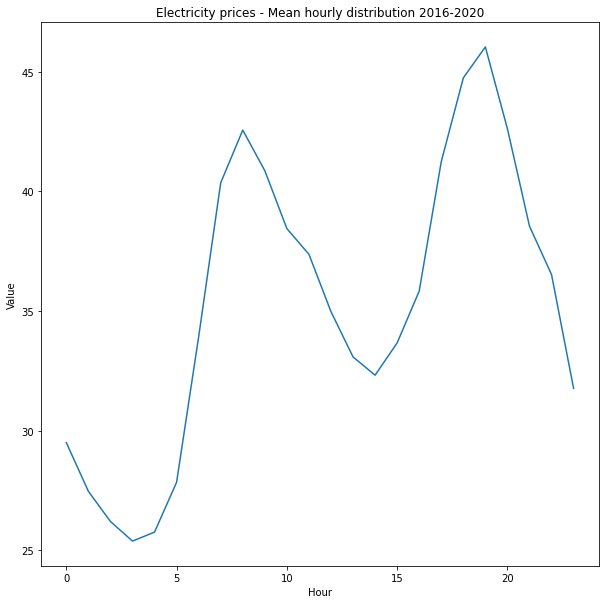

In [147]:
# Plotting

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.plot(data.Value)
ax.set_xlabel("Hour")
ax.set_ylabel("Value")
ax.set_title("Electricity prices - Mean hourly distribution 2016-2020")

In [148]:
fig.savefig('{}/Electricity prices - Mean hourly distribution 2016-2020'.format(directory))

In [149]:
# Plot data of one specific day
Day = "2016-06-07"  #set the Day you want to plot 


dg = MontelDataGetter("montel_test")
dg.get_data('% s' % Day,'% s' % Day, overwrite=True)
assert os.path.exists(os.path.join(dg.data_dir, 'data.csv'))
df = pd.read_csv(os.path.join(dg.data_dir, 'data.csv'))
assert df.shape == (dg._get_num_days() * 24, 2)

df['Time']= pd.to_datetime(df['Time'])
df = df.set_index("Time")


Text(0.5, 1.0, "Electricity Price of '2016-06-07'")

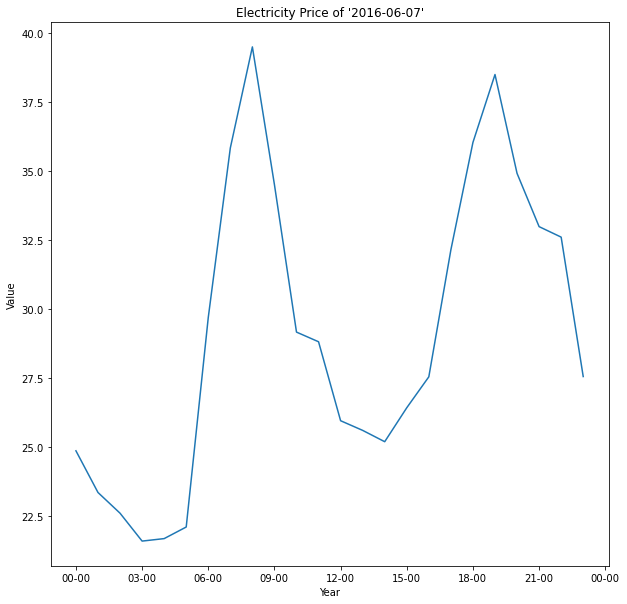

In [150]:
# Plotting

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
date_form = DateFormatter("%H-%M")
ax.plot(df.Value)
ax.set_xlabel("Year")
ax.set_ylabel("Value")
ax.xaxis.set_major_formatter(date_form)
ax.set_title("Electricity Price of '% s'" % Day)


In [151]:
fig.savefig("{}/Electricity Price of '% s'".format(directory) % Day)

In [152]:
# Yearly Comparison

In [153]:
dg = MontelDataGetter("montel_test")

dg.get_data('2017-01-01', '2017-12-31', overwrite=True)
assert os.path.exists(os.path.join(dg.data_dir, 'data.csv'))
df2017 = pd.read_csv(os.path.join(dg.data_dir, 'data.csv'))
assert df2017.shape == (dg._get_num_days() * 24, 2)

dg.get_data('2018-01-01', '2018-12-31', overwrite=True)
assert os.path.exists(os.path.join(dg.data_dir, 'data.csv'))
df2018 = pd.read_csv(os.path.join(dg.data_dir, 'data.csv'))
assert df2018.shape == (dg._get_num_days() * 24, 2)

dg.get_data('2019-01-01', '2019-12-31', overwrite=True)
assert os.path.exists(os.path.join(dg.data_dir, 'data.csv'))
df2019 = pd.read_csv(os.path.join(dg.data_dir, 'data.csv'))
assert df2019.shape == (dg._get_num_days() * 24, 2)

dg.get_data('2020-01-01', '2020-12-31', overwrite=True)
assert os.path.exists(os.path.join(dg.data_dir, 'data.csv'))
df2020 = pd.read_csv(os.path.join(dg.data_dir, 'data.csv'))
assert df2020.shape == (dg._get_num_days() * 24, 2)


df2017['Time']= pd.to_datetime(df2017['Time'])
df2017 = df2017.set_index("Time")
df2018['Time']= pd.to_datetime(df2018['Time'])
df2018 = df2018.set_index("Time")
df2019['Time']= pd.to_datetime(df2019['Time'])
df2019 = df2019.set_index("Time")
df2020['Time']= pd.to_datetime(df2020['Time'])
df2020 = df2020.set_index("Time")


Text(0.5, 1.0, '2020')

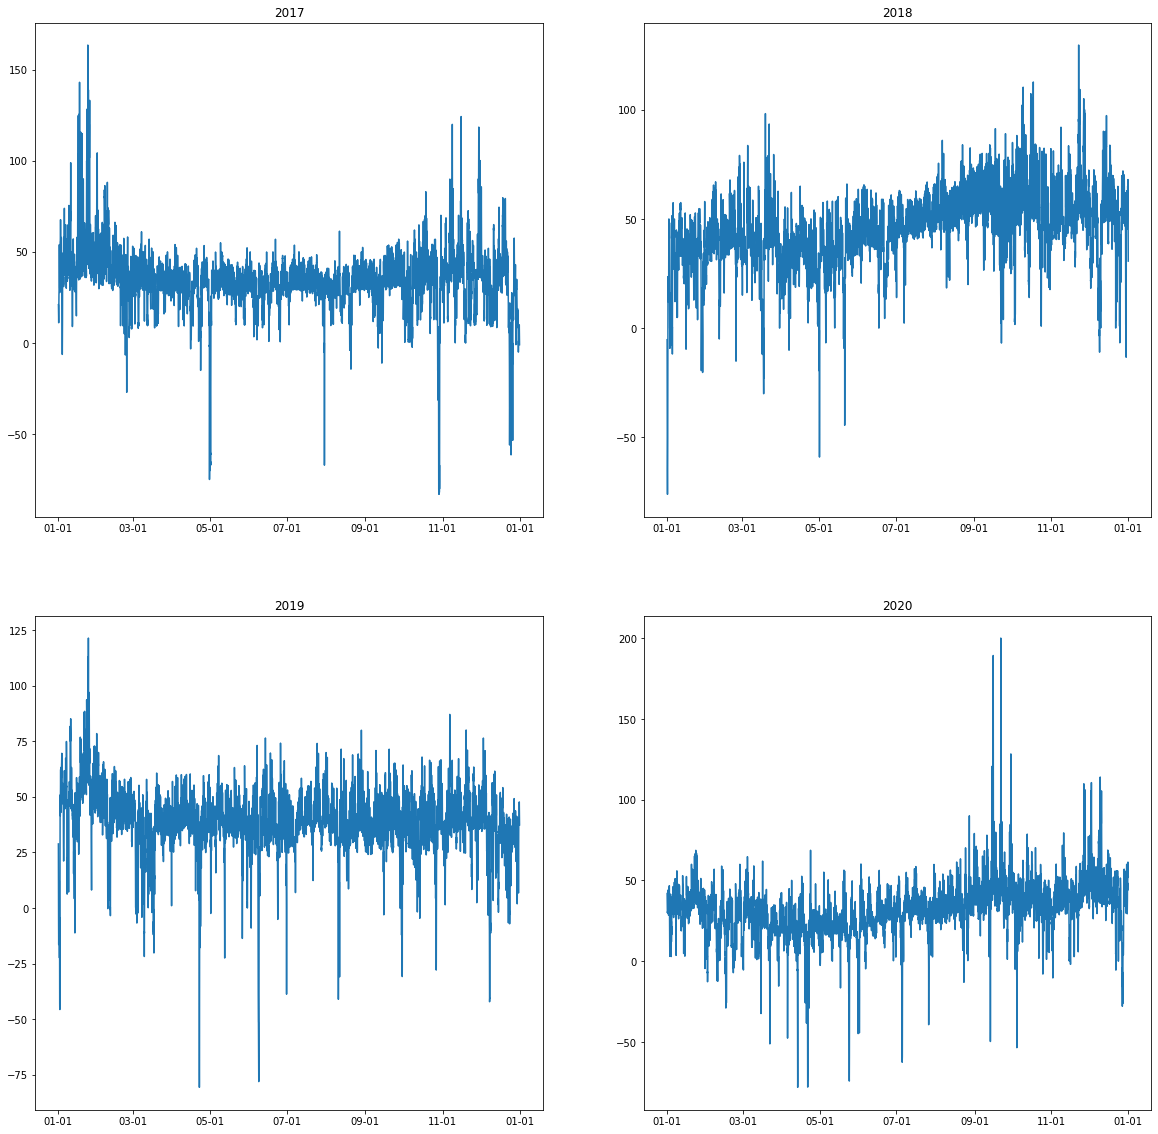

In [154]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(20, 20)
date_form = DateFormatter("%m-%d")
axs[0, 0].plot(df2017.Value)
axs[0, 0].xaxis.set_major_formatter(date_form)
axs[0, 0].set_title('2017')
axs[0, 1].plot(df2018.Value)
axs[0, 1].xaxis.set_major_formatter(date_form)
axs[0, 1].set_title('2018')
axs[1, 0].plot(df2019.Value)
axs[1, 0].xaxis.set_major_formatter(date_form)
axs[1, 0].set_title('2019')
axs[1, 1].plot(df2020.Value)
axs[1, 1].xaxis.set_major_formatter(date_form)
axs[1, 1].set_title('2020')




In [155]:
fig.savefig('{}/Electricity prices - Yearly comparison'.format(directory))

In [156]:
df2020.reset_index(inplace=True) #need to be done for the next plots

In [157]:
#Plot the values over a year of specific time of day. Here 00:00h
data = []
for i in range(int(len(df2020)/24)):
   data.append([i, df2020.loc[i*24, "Value"]])
data = pd.DataFrame(data, columns=["Time","Value"])


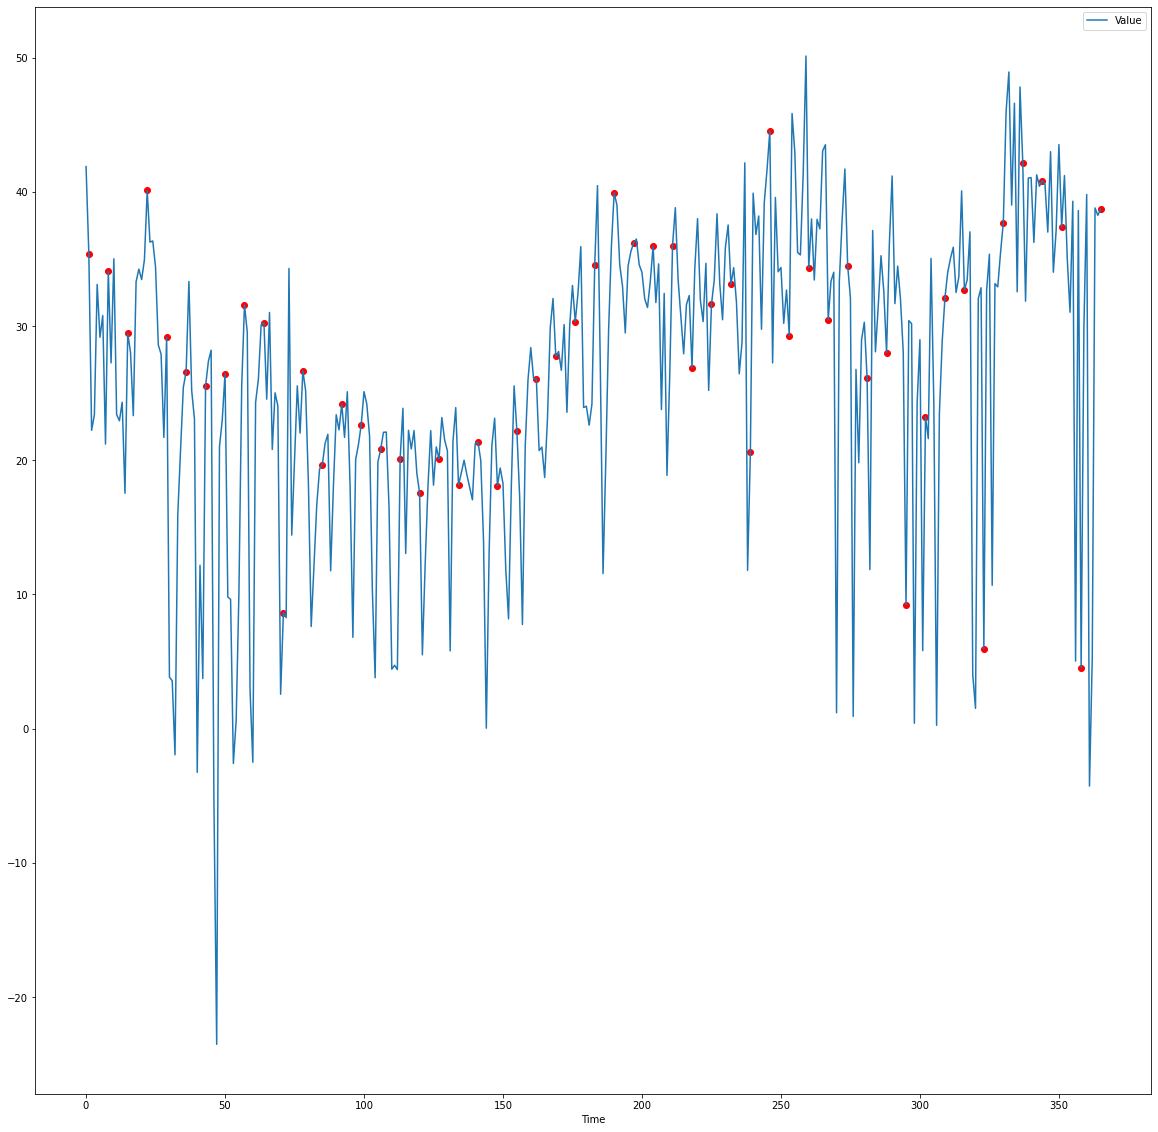

In [158]:
plot = data.plot("Time", "Value",figsize=(20,20))
# mark specific day 
i = 1    # In 2020 i = 1 means Thursday (2 = Friday and so on)
plt.scatter(data.Time[i::7],data.Value[i::7], color="red")

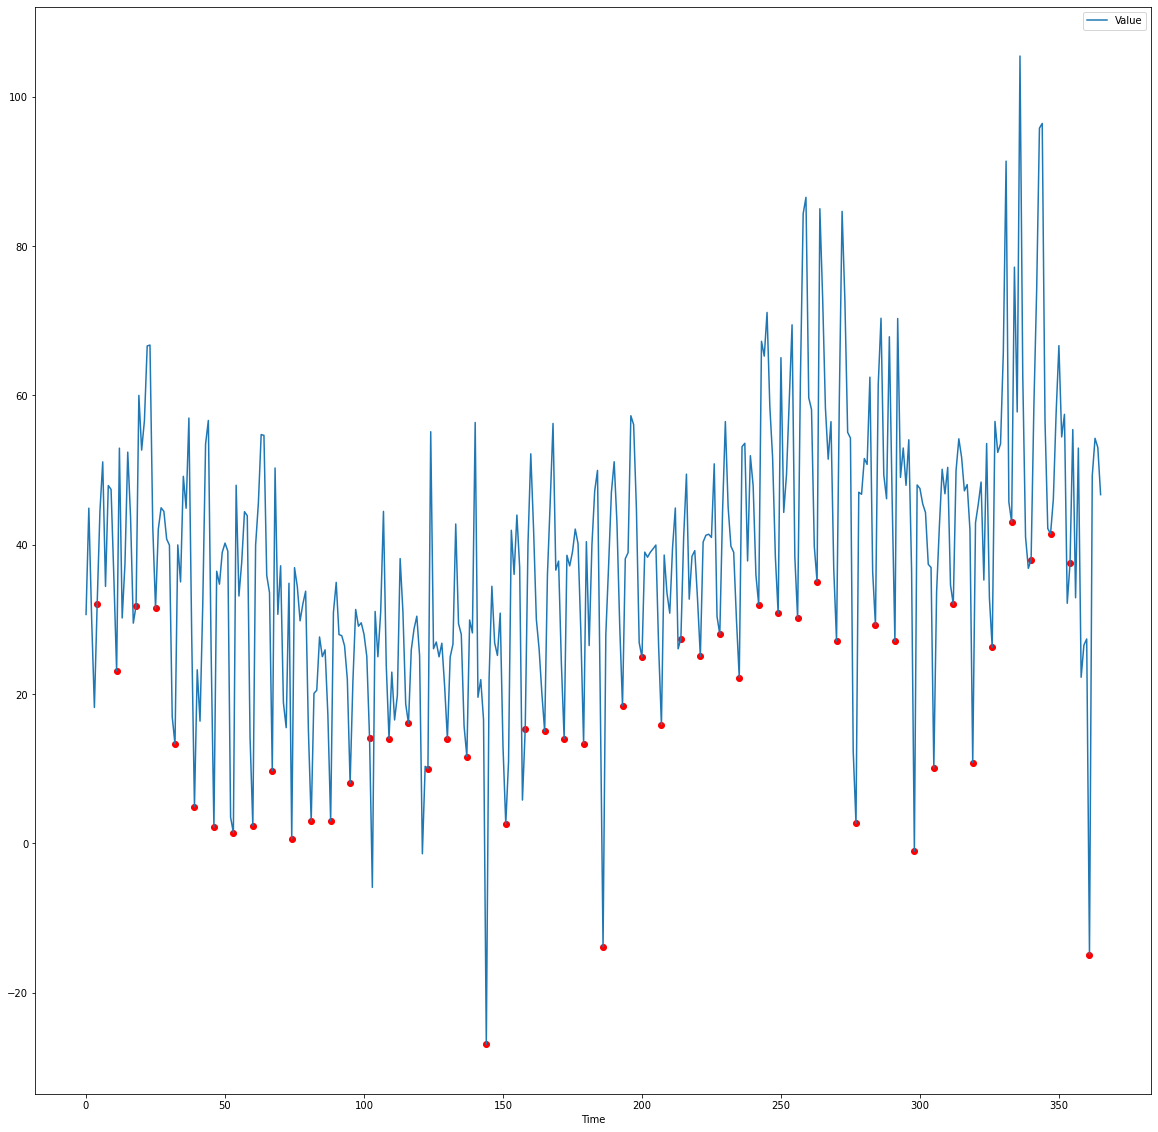

In [159]:
#Time = 08:00
data = []
for i in range(int(len(df2020)/24)):
   data.append([i, df2020.loc[i*24+8, "Value"]])
data = pd.DataFrame(data, columns=["Time","Value"])


data.plot("Time", "Value",figsize=(20,20))
i = 4 # In 2020 i = 4 means sunday 
plt.scatter(data.Time[i::7],data.Value[i::7], color="red")

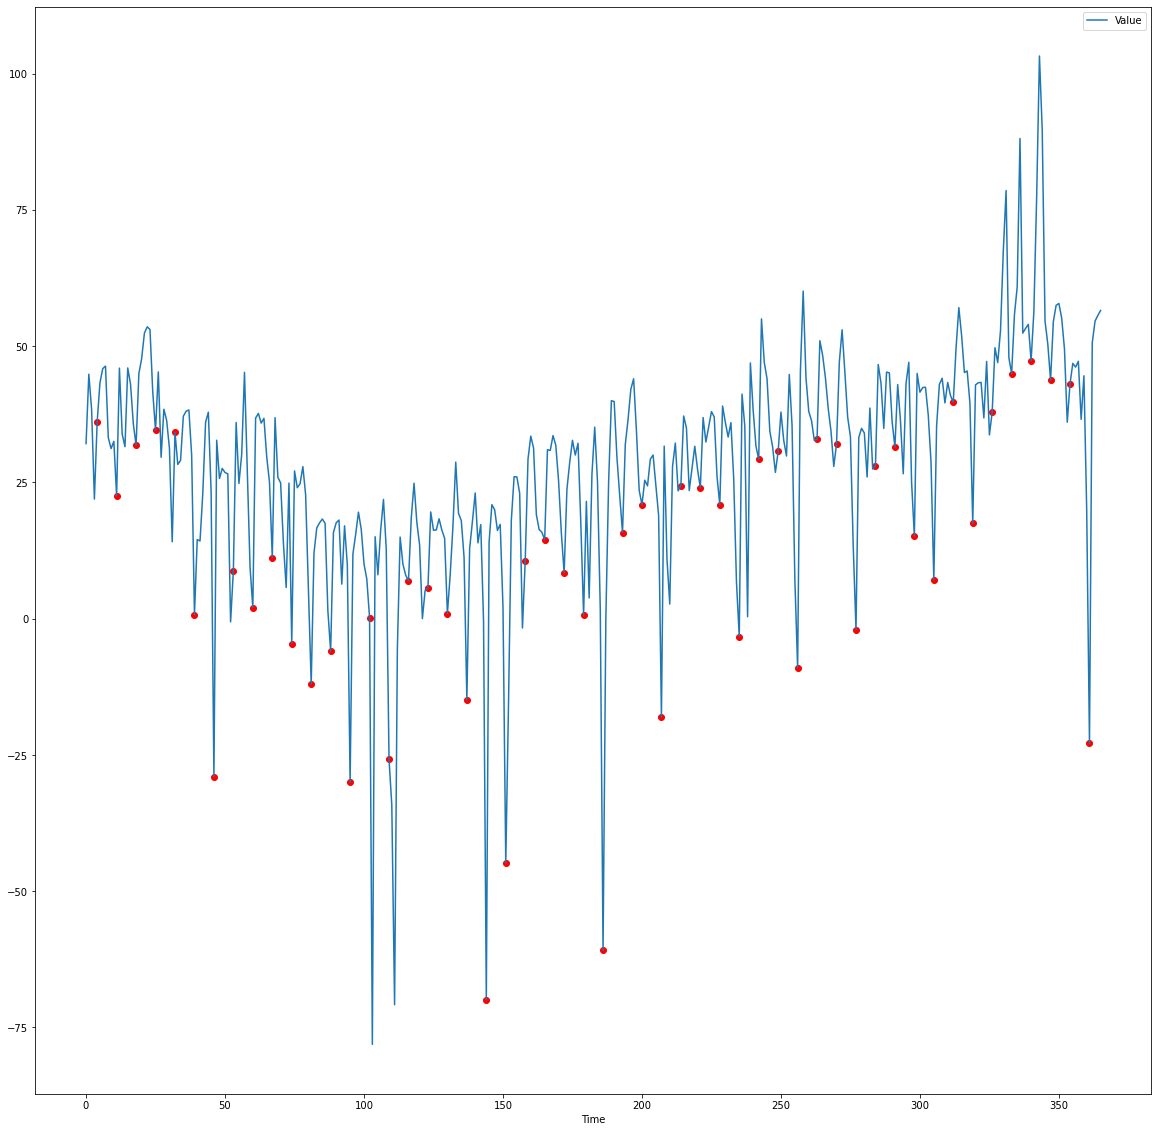

In [160]:
#specific hour, sunday highlighted
data = []
for i in range(int(len(df2020)/24)):
   data.append([i, df2020.loc[i*24+15, "Value"]])
data = pd.DataFrame(data, columns=["Time","Value"])

data.plot("Time", "Value",figsize=(20,20))
i = 4 # In 2020 i = 4 means sunday 
plt.scatter(data.Time[i::7],data.Value[i::7], color="red")

In [161]:
fig = plot.get_figure()
fig.savefig('{}/Mean Electricity prices 15h 2020, Sundays marked'.format(directory))

In [162]:
#Resample to daily Values Year: 2020
dg = MontelDataGetter("montel_test")
dg.get_data('2020-01-01', '2020-12-31', overwrite=True)
assert os.path.exists(os.path.join(dg.data_dir, 'data.csv'))
df = pd.read_csv(os.path.join(dg.data_dir, 'data.csv'))
assert df.shape == (dg._get_num_days() * 24, 2)

df['Time']= pd.to_datetime(df['Time'])
df = df.set_index("Time")
daily = df.resample('D').mean()

Text(0.5, 1.0, "Daily Electricity Price of 2020'")

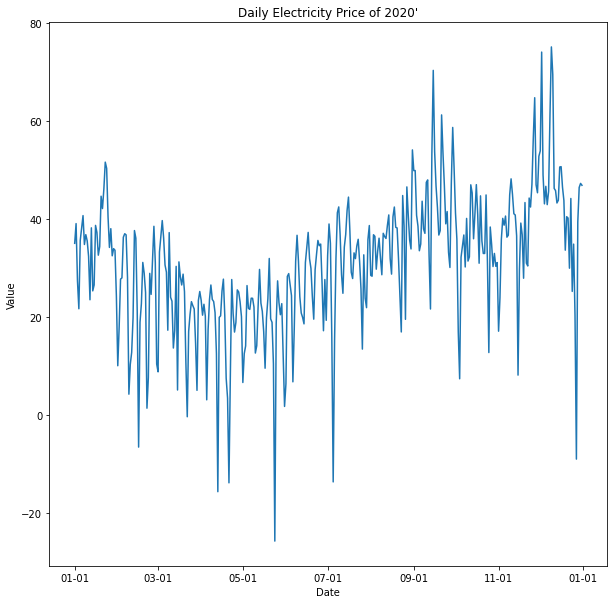

In [163]:
# Plotting

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
date_form = DateFormatter("%m-%d")
ax.plot(daily.Value)
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.xaxis.set_major_formatter(date_form)
ax.set_title("Daily Electricity Price of 2020'" )


In [164]:
fig.savefig('{}/Daily Electricity Price of 2020'.format(directory))

In [165]:
#Resample to weekly
dg = MontelDataGetter("montel_test")
dg.get_data('2020-01-01', '2020-12-31', overwrite=True)
assert os.path.exists(os.path.join(dg.data_dir, 'data.csv'))
df = pd.read_csv(os.path.join(dg.data_dir, 'data.csv'))
assert df.shape == (dg._get_num_days() * 24, 2)

df['Time']= pd.to_datetime(df['Time'])
df = df.set_index("Time")
weekly = df.resample('W').mean()

Text(0.5, 1.0, "Weekly Electricity Price of 2020'")

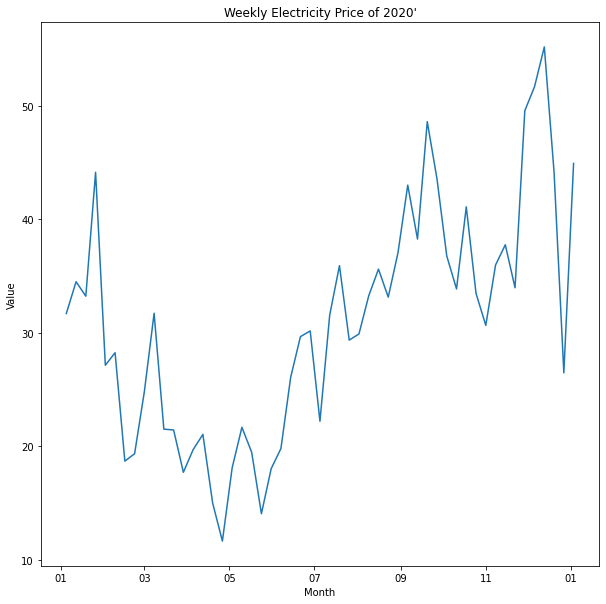

In [166]:
# Plotting

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
date_form = DateFormatter("%m")
ax.plot(weekly.Value)
ax.set_xlabel("Month")
ax.set_ylabel("Value")
ax.xaxis.set_major_formatter(date_form)
ax.set_title("Weekly Electricity Price of 2020'" )

In [167]:
fig.savefig('{}/Weekly Electricity Price of 2020'.format(directory))